In [1]:
%matplotlib inline

import os
import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [2]:
!pip install tensorflow-datasets
import tensorflow_datasets as tfds

# Carregando o dataset de gatos e cachorros.
ds_train, ds_test = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'], # Dividindo em 80% treino e 20% validação
    shuffle_files=True,
    as_supervised=True,
)
print("Dataset de gatos e cachorros carregado com sucesso!")

Dataset de gatos e cachorros carregado com sucesso!


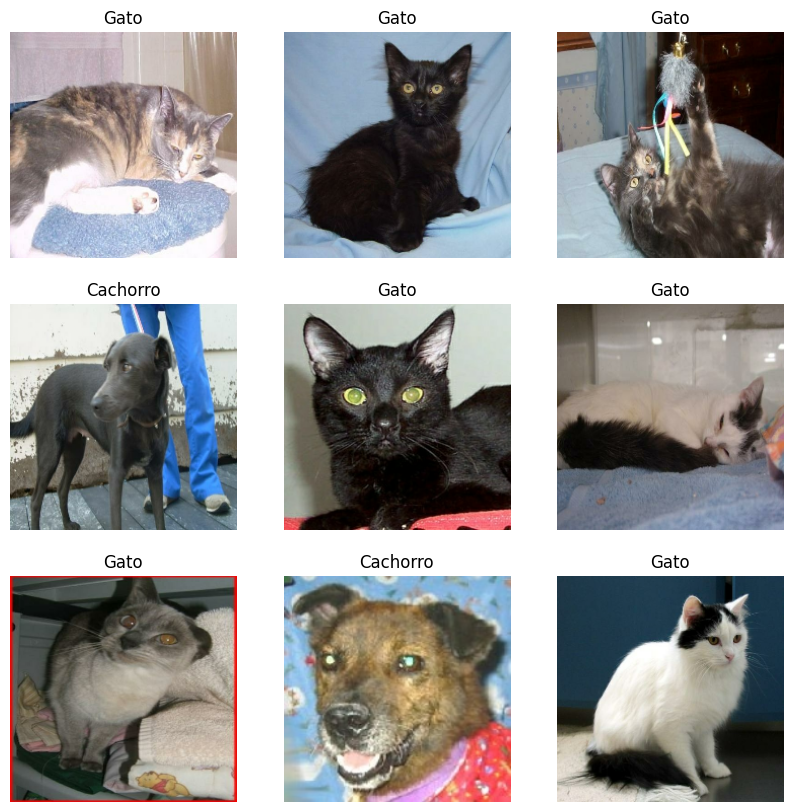

Datasets preparados para o treinamento!


In [3]:
import tensorflow as tf

# Definindo as dimensões das imagens e o número de classes
IMG_WIDTH = 224
IMG_HEIGHT = 224
NUM_CLASSES = 2 # Gatos e Cachorros

# A função de pré-processamento que será aplicada a cada imagem do dataset
def format_image(image, label):
    # Converte para float32 e redimensiona a imagem
    image = tf.image.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = tf.cast(image, tf.float32)

    # Aplica a normalização para o modelo pré-treinado
    image = (image / 127.5) - 1

    # Transforma o label para a classificação
    label = tf.one_hot(label, NUM_CLASSES)

    return image, label

# Aplicando a função de pré-processamento nos datasets
ds_train = ds_train.map(format_image)
ds_test = ds_test.map(format_image)

# Configurando o tamanho dos lotes (batches) e o cache para otimizar o desempenho
BATCH_SIZE = 32
ds_train = ds_train.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Demonstração de uma imagem do dataset (apenas para visualização)
import matplotlib.pyplot as plt

# A função 'take(1)' pega um lote do dataset
for images, labels in ds_train.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # Normalização inversa para exibir a imagem corretamente
        plt.imshow((images[i].numpy() * 0.5) + 0.5)

        # Exibe o rótulo (o índice do vetor one-hot)
        label_text = "Gato" if np.argmax(labels[i]) == 0 else "Cachorro"
        plt.title(label_text)
        plt.axis("off")
    plt.show()

# Resumo para confirmar que tudo foi carregado e pré-processado
print("Datasets preparados para o treinamento!")

In [4]:
# Modelo CNN do zero (para comparação)
print("--- Treinando o modelo CNN do zero ---")

INPUT_SHAPE = (224, 224, 3) # Altura, Largura, Canais
NUM_CLASSES = 2

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

--- Treinando o modelo CNN do zero ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,186 (84.86 MB)

 Trainable params: 22,245,186 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
try:
  # Usando fit() com os objetos de dataset do TensorFlow
  history = model.fit(ds_train,
                      epochs=10,
                      validation_data=ds_test)

  # Plotting
  fig = plt.figure(figsize=(16,4))
  ax = fig.add_subplot(121)
  ax.plot(history.history["val_loss"])
  ax.set_title("validation loss")
  ax.set_xlabel("epochs")

  ax2 = fig.add_subplot(122)
  ax2.plot(history.history["val_accuracy"]) # Corrigido para "val_accuracy"
  ax2.set_title("validation accuracy")
  ax2.set_xlabel("epochs")
  ax2.set_ylim(0, 1)
  plt.show()

  loss, accuracy = model.evaluate(ds_test, verbose=0)
  print('Test loss:', loss)
  print('Test accuracy:', accuracy)
except Exception as e:

  print(f"Erro durante o treinamento: {e}")

print("--- Treinando o modelo com Transfer Learning (VGG16) ---")

Epoch 1/10
496/582 ━━━━━━━━━━━━━━━━━━━━ 3:15 2s/step - accuracy: 0.5752 - loss: 0.8789

In [ ]:
# Modelo de Transfer Learning (VGG16)

# Carrega o modelo VGG16 pré-treinado na ImageNet, sem as camadas de topo
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False, # Removendo as camadas de classificação
    input_shape=INPUT_SHAPE
)

# Congela os pesos do modelo base
base_model.trainable = False

# Adiciona as novas camadas de classificação
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x) # Acha a média dos valores para reduzir a dimensionalidade
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

In [ ]:
# Monta o novo modelo
model_transfer = Model(inputs=base_model.input, outputs=predictions)

model_transfer.compile(loss='categorical_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

model_transfer.summary()

# Treinando o modelo com os datasets do TensorFlow
history2 = model_transfer.fit(ds_train,
                              epochs=10,
                              validation_data=ds_test)

In [ ]:
# Plotting
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"], label="CNN do zero")
ax.plot(history2.history["val_loss"], label="Transfer Learning (VGG16)")
ax.set_title("Validation Loss")
ax.set_xlabel("Epochs")
ax.legend()

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"], label="CNN do zero")
ax2.plot(history2.history["val_accuracy"], label="Transfer Learning (VGG16)")
ax2.set_title("Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylim(0, 1)
ax2.legend()
plt.show()

loss, accuracy = model_transfer.evaluate(ds_test, verbose=0)
print('Test loss (Transfer Learning):', loss)
print('Test accuracy (Transfer Learning):', accuracy)

In [ ]:
# A parte de inferência com uma imagem específica
def get_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = (img_array / 127.5) - 1 # Normalização igual ao treinamento
    return img_array

# Para testar, você precisa ter uma imagem de gato ou cachorro
# Exemplo: Se você subiu uma imagem chamada 'gato_exemplo.jpg'
img_path = 'gato_exemplo.jpg'
img_tensor = get_image(img_path)
probabilities = model_transfer.predict(img_tensor)

print(f"Probabilidades para a imagem de exemplo: Gato: {probabilities[0][0]:.2f}, Cachorro: {probabilities[0][1]:.2f}")